## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
loan=pd.read_csv('/content/drive/My Drive/greatlearning/Loan_Modelling.csv')

In [5]:
# copying data to another varaible to avoid any changes to original data
data=loan.copy()

## Data Overview

In [6]:
data.head(5) #Complete view of first 5 rows of data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.tail(5) #Complete view of last 5 rows of data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


* Observations
* Sanity checks

In [ ]:
data.shape #Checking the shape of the data

(5000, 14)

There are 5000 rows and 14 columns in the dataset

In [ ]:
data.info() #Checking the data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Personal_loan is a dependent variable type int
All the other dependent variable has type int apart from CC avg which is float.

In [ ]:
data.describe().T # Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Age: Customers' ages range from 23 to 67, with a mean of 45.33 years. Most customers fall between 35 and 55 years, with a median of 45 years.

Experience: The average professional experience is 20.13 years, with a range from 0 to 43 years. A typical customer has 10 to 30 years of experience.

Income: Annual income varies widely from $8,000 to $224,000

Family Size: Family sizes range from 1 to 4, with an average of 2.4 members. Half of the customers have families of 2 or 3 members.

Credit Card Average (CCAvg): Monthly credit card spending ranges from $0 to $10,000, with an average of $1,938. The

majority spend between $700 and $2,500.

Education: Education is categorized into three levels (1: Undergrad, 2: Graduate, 3: Advanced/Professional). The average education level is close to 2, indicating a high number of graduates.

Mortgage: The mortgage values range from $0 to $635,000, with an average of $56,498.

Personal Loan: Only about 9.6% of customers took a personal loan in the last campaign, reflecting a relatively low conversion rate.

Securities Account: Approximately 10.4% of customers have a securities account with the bank.

CD Account: Only 6% of customers hold a certificate of deposit (CD) account.

Online Banking: Around 59.7% of customers use online banking services.

Credit Card: Roughly 29.4% of customers use credit cards issued by other banks.

In [8]:
data = data.drop(['ID'], axis=1)  # Completing the code to drop a column from the dataframe

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [9]:
data.isnull().sum() #Checking for missing values

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


There are no missing value in the dataset

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

There are no duplicated value the dataset


In [ ]:
data["Experience"].nunique() #Checking the unique values in experience column

47

In [11]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].nunique()

0

In [12]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [13]:
data["Education"].unique()

array([1, 2, 3])

In [14]:
data["ZIPCode"].nunique()

467

In [15]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [16]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

 The below functions need to be defined to carry out the EDA.

In [17]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [20]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Observation on Age




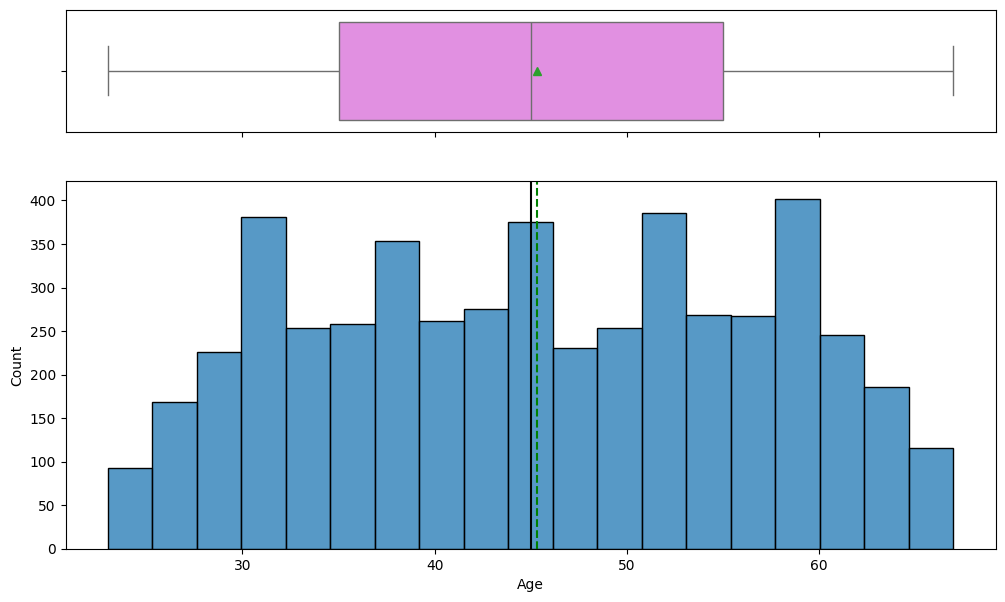

In [21]:
histogram_boxplot(data, "Age")

The average mean of the age is between 40 and 50.
There are no outlier present

Observation on Experience

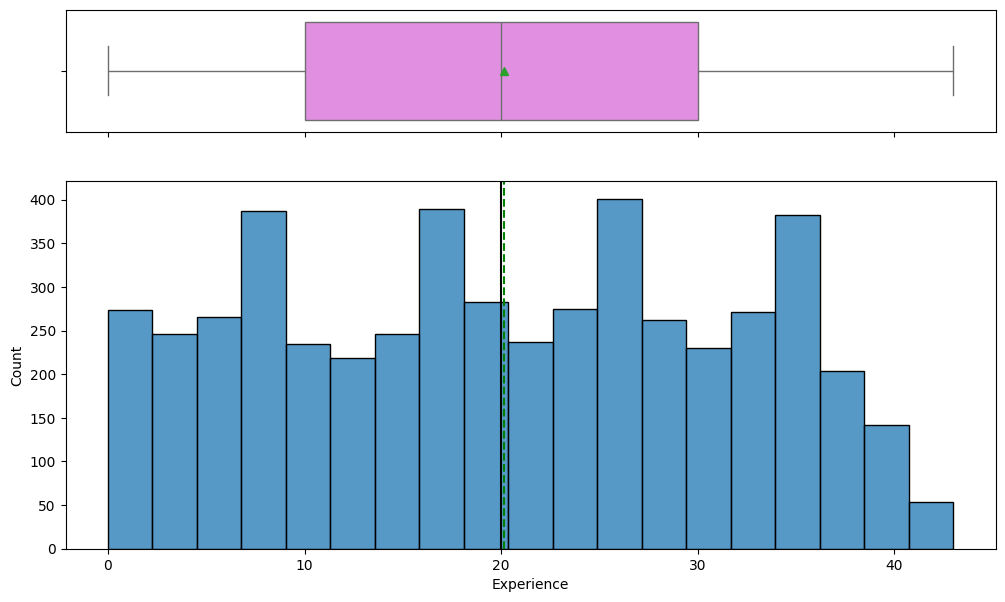

In [22]:
histogram_boxplot(data,'Experience') ## Complete the code to create histogram_boxplot for experience

The avg experience years is 20.
There is no outlier present in the dataset.

Observation on Income

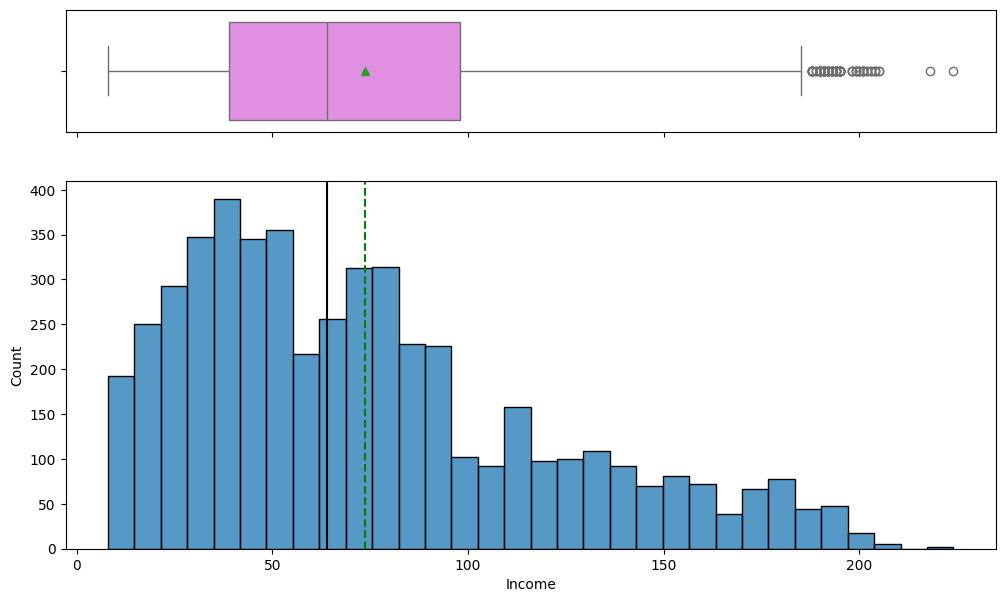

In [23]:
histogram_boxplot(data,'Income') ## Complete the code to create histogram_boxplot for Income

Observations on CCAvg

The average income in the dataset ranges between 55 and 60. There are no outliers present in the data, and the distribution of the income variable is skewed to the right.

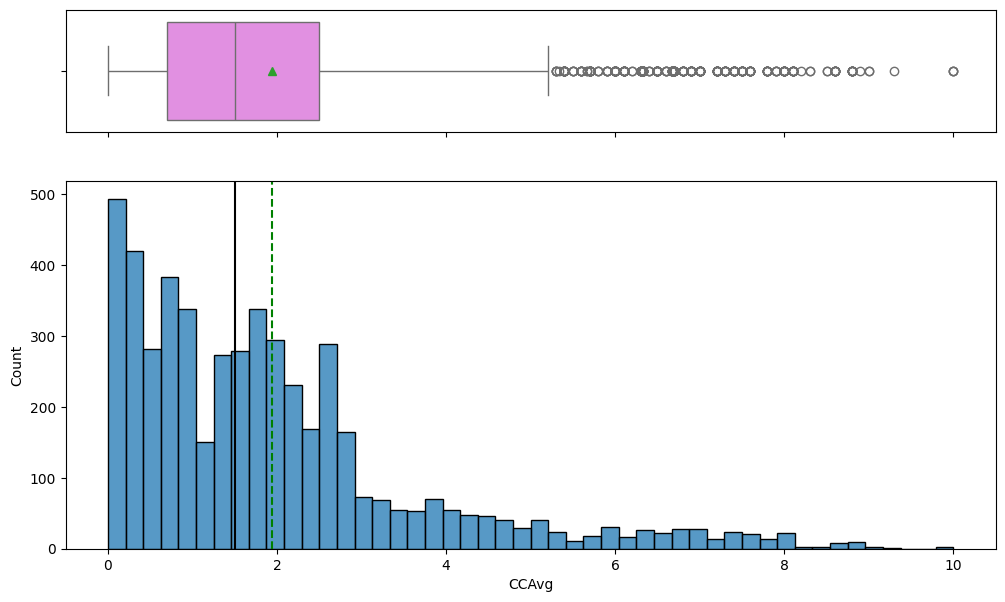

In [24]:
histogram_boxplot(data,'CCAvg') ## Complete the code to create histogram_boxplot for CCAvg

The average spending on credit cards is slighly less than $2000, The dataset is right skewed with outliers on the right

Observations on Mortgage

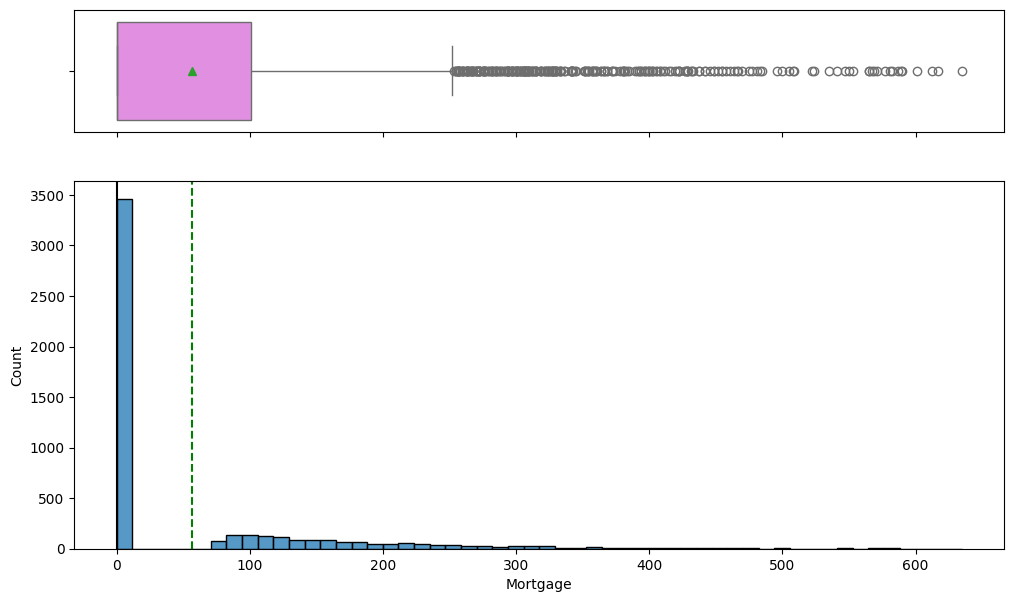

In [25]:
histogram_boxplot(data,'Mortgage')  #histogram_boxplot for Mortgage

What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

The dataset for mortgage is right skewed.
There are outliers at the right.
average mortgage rate is slightly greater than $55000

Observations on Family

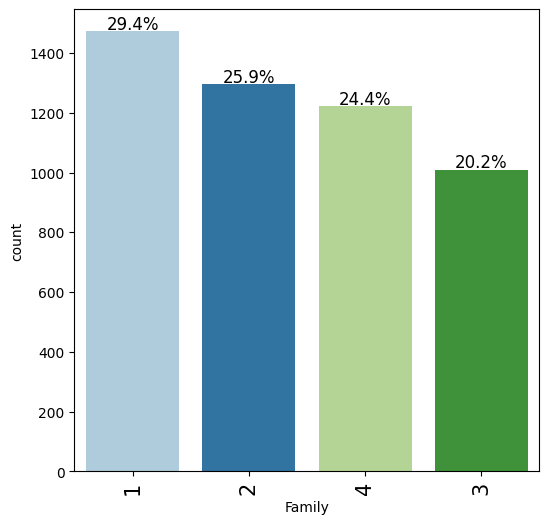

In [26]:
labeled_barplot(data, "Family", perc=True)

29.4% customers are single.
with 25.9% customers has 2 family members and 24.4% has 4 and 20.2% has 3 family members.

Observations on Education

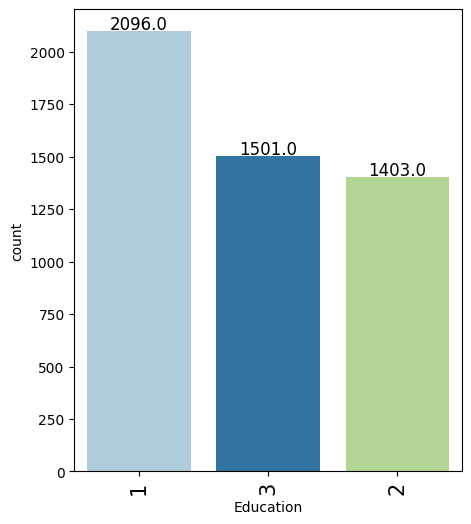

In [27]:
labeled_barplot(data,'Education')

Majority of the customers are undergrad.
There are also customers who are Grduate and Advanced Professional

Observations on Securities_Account

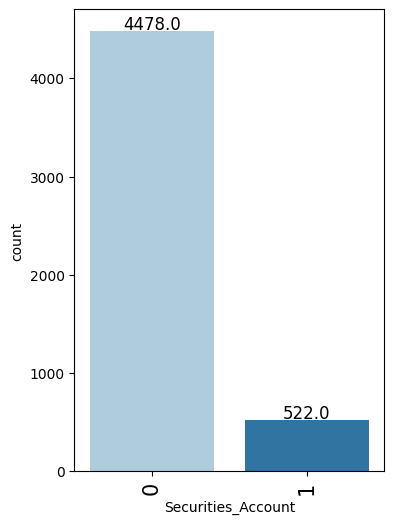

In [28]:
labeled_barplot(data,'Securities_Account')

Majority of the customers do not have securities account with the bank.

Observations on CD_Account

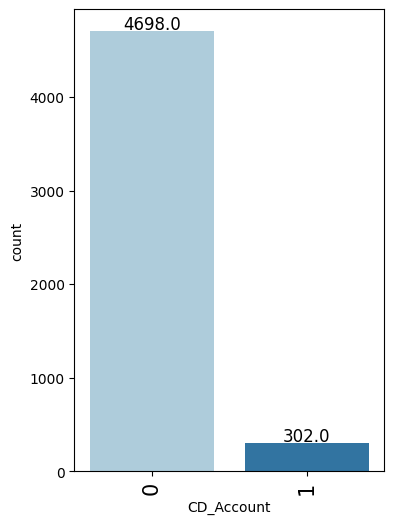

In [29]:
labeled_barplot(data,'CD_Account')

Majority of the customers do not have CD Account with the Bank.

Observation on Online

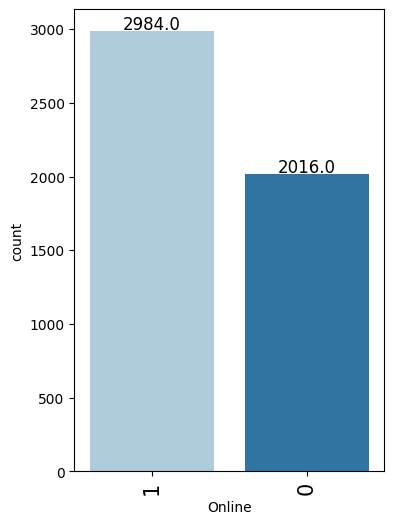

In [30]:
labeled_barplot(data,'Online')

Majority of customers uses online banking.

Observation on Credit Card

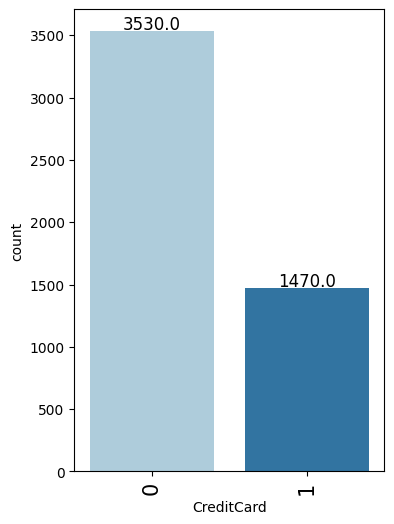

In [31]:
labeled_barplot(data,'CreditCard')

How many customers have credit cards?
1470 Customers has credit cards from other banks

Observation on ZIPCODE

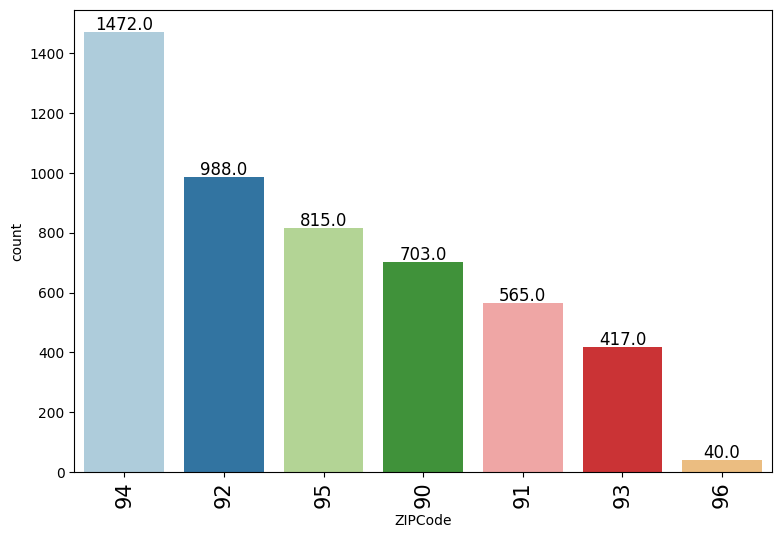

In [32]:
labeled_barplot(data,'ZIPCode')

Most of the Customers zip code starts at 94

Bivariate Analysis

In [33]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Corelation Check

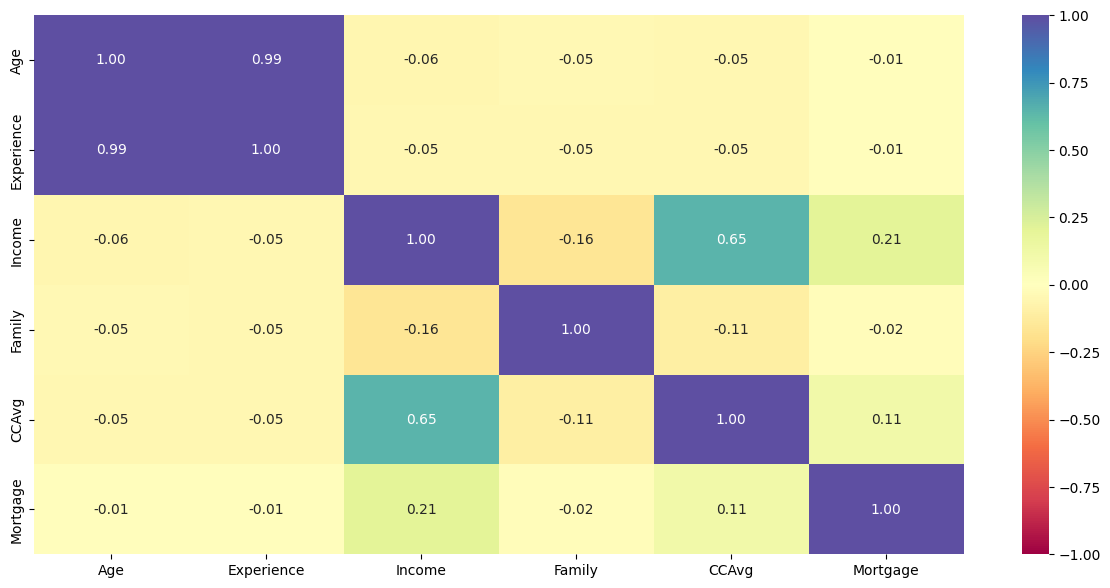

In [35]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

What are the attributes that have a strong correlation with the target attribute (personal loan)?

Customers Income has strong corelation with personal loan. Also,Credit card average and CD account has high positive co relation with personal loan.

Let's check how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


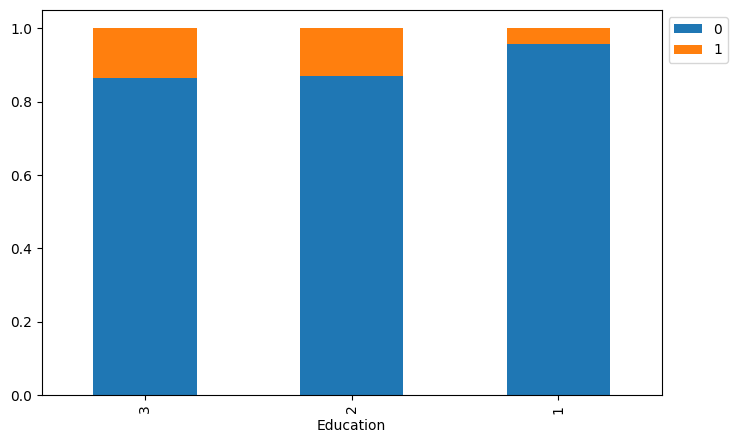

In [36]:
stacked_barplot(data, "Education", "Personal_Loan")

Most customers who are advanced/professional took personal loans.

Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


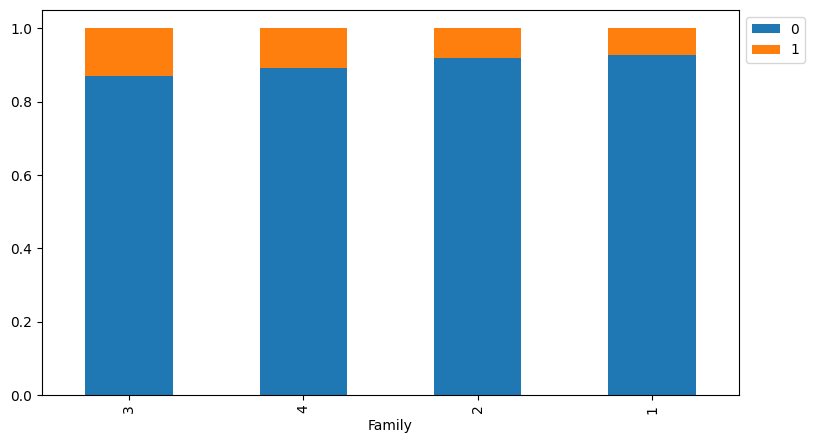

In [37]:
stacked_barplot(data, "Family", "Personal_Loan")

Customers who are family of 4, approx 10.96% of them took personal loan.
Customers who are family of 3, approx 13.96% of them took the loan.
Customers who are family of 2, approx 8.17% of them took personal loan and among single family members 7.26% took the loan.

Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


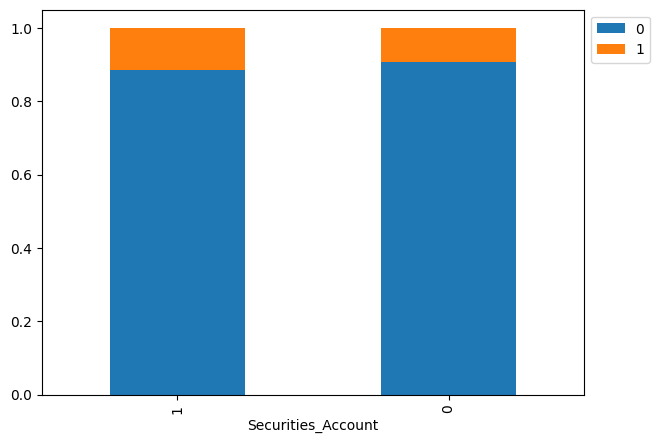

In [38]:
stacked_barplot(data,'Securities_Account','Personal_Loan')

Most customers who don't have securities account, took personal loan.

Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


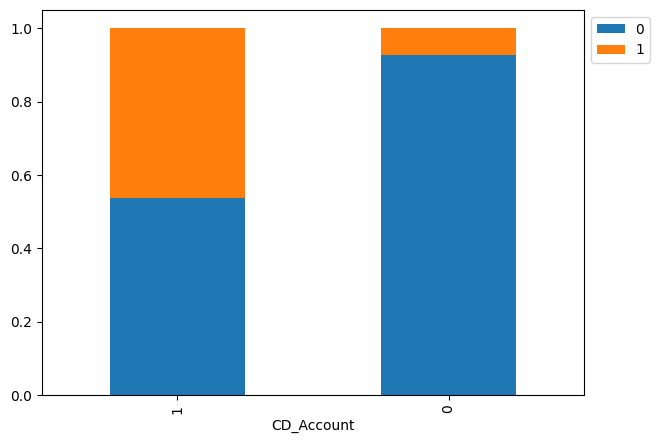

In [39]:
stacked_barplot(data,'CD_Account','Personal_Loan')

Most of the customers who don't have CD_Account took Personal loan.

Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


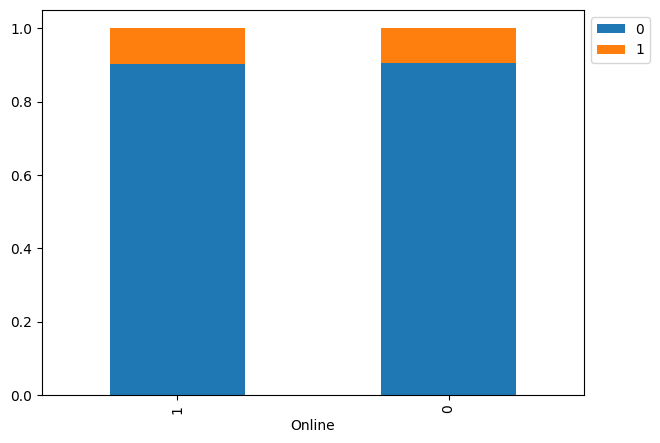

In [40]:
stacked_barplot(data,'Online','Personal_Loan')

Most of the customers who uses online facilities took personal loan

Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


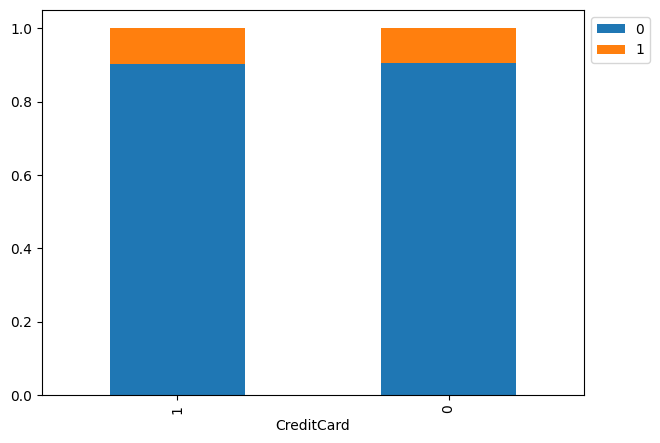

In [41]:
stacked_barplot(data,'CreditCard','Personal_Loan')

Most of the customers who don't have credit cards from other banks took Personal loan.

Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


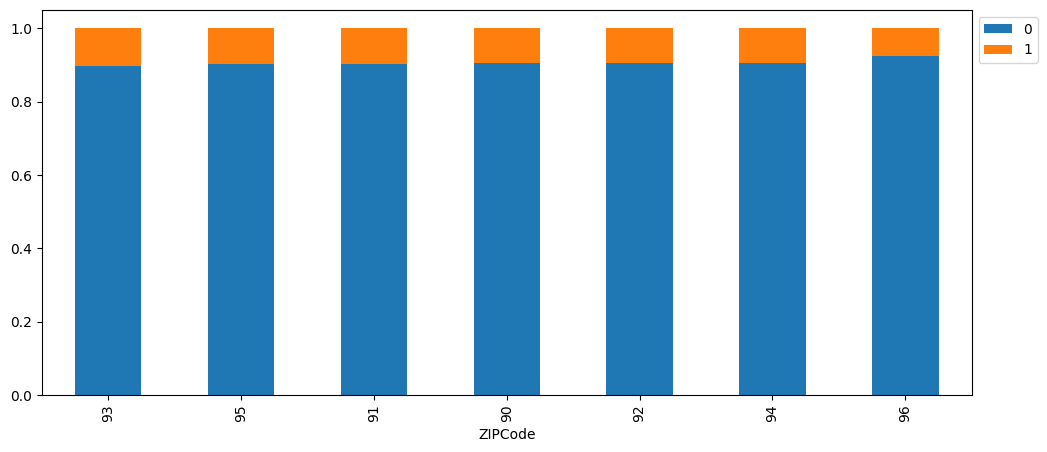

In [42]:
stacked_barplot(data,'ZIPCode','Personal_Loan')

How does a customer's interest in purchasing a loan vary with their age?

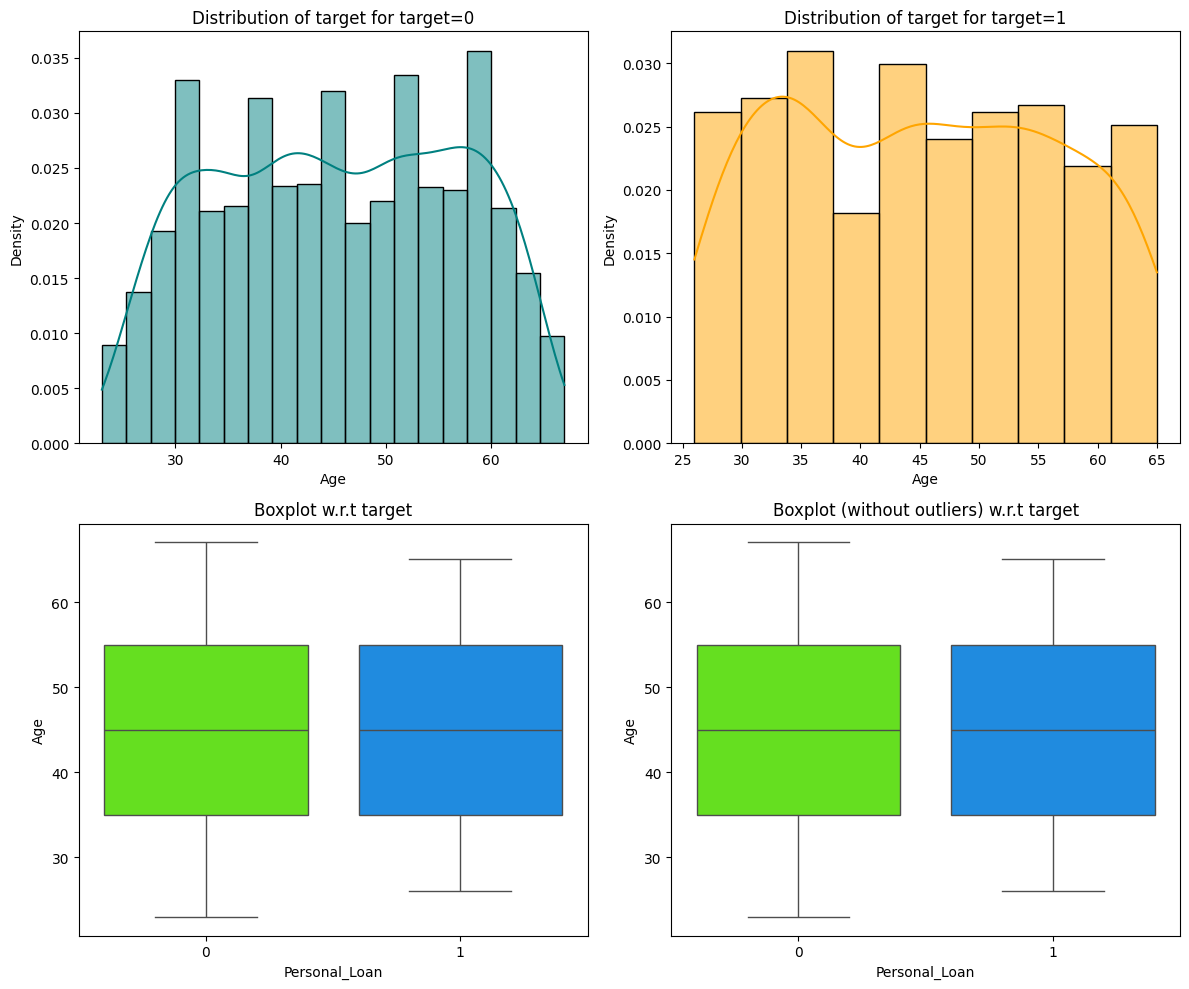

In [43]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

Most of the customers aged between 40 to 50 took personal loan

Personal Loan vs Experience

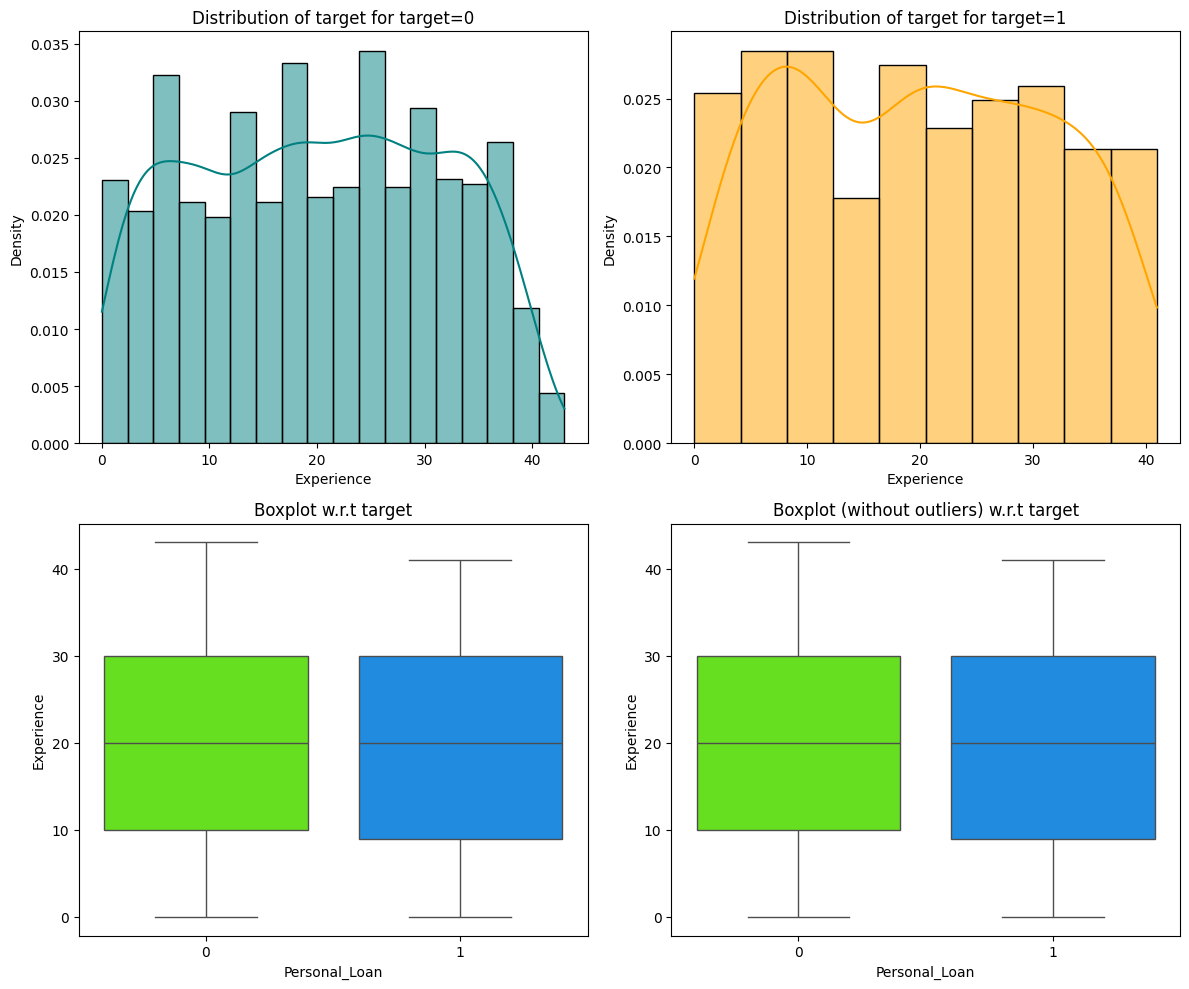

In [44]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

Average years of experience is 20 years

Personal Loan vs Income

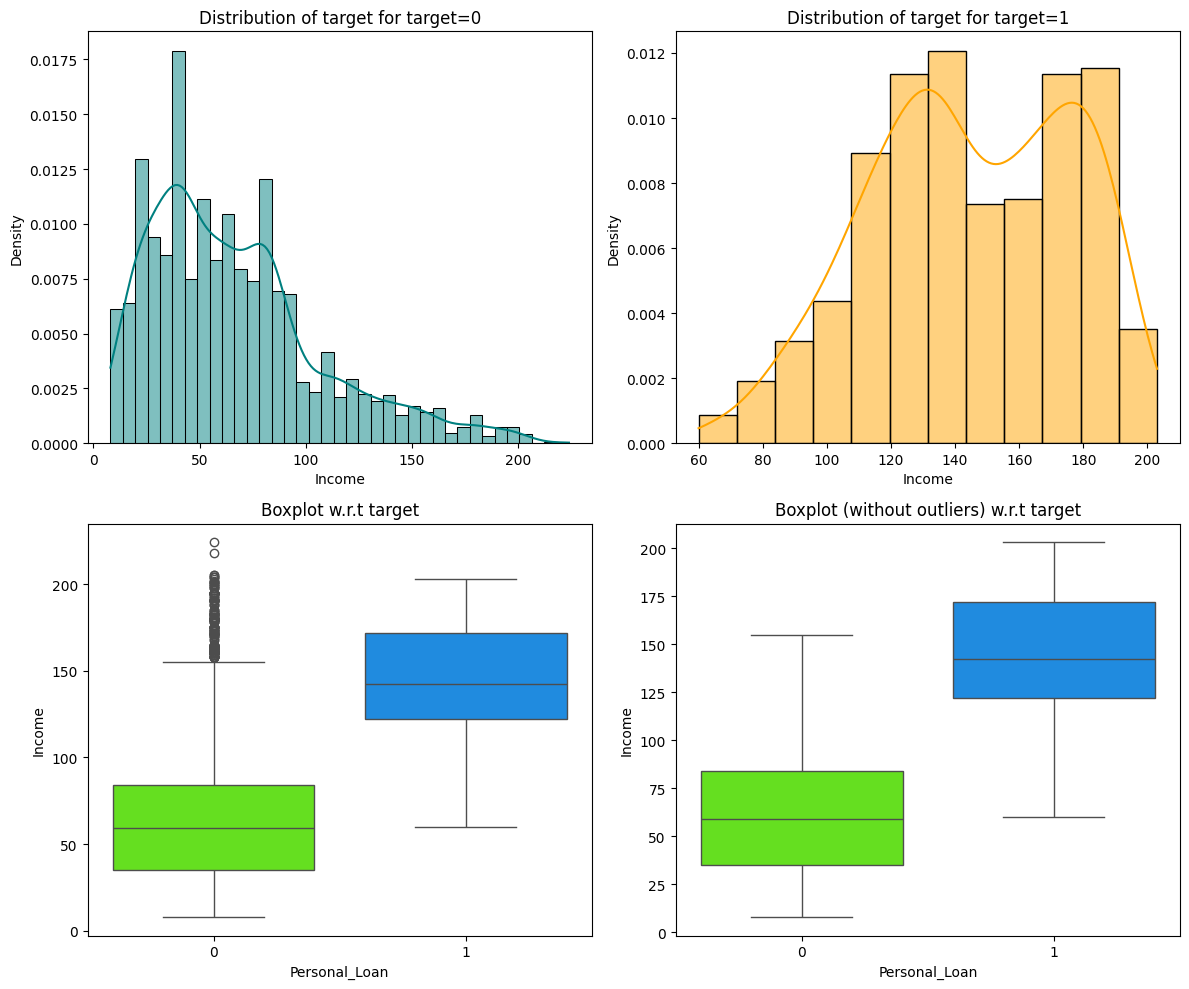

In [45]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

Most customers with income a little less than 150 took the loan.

Personal Loan vs CCAvg

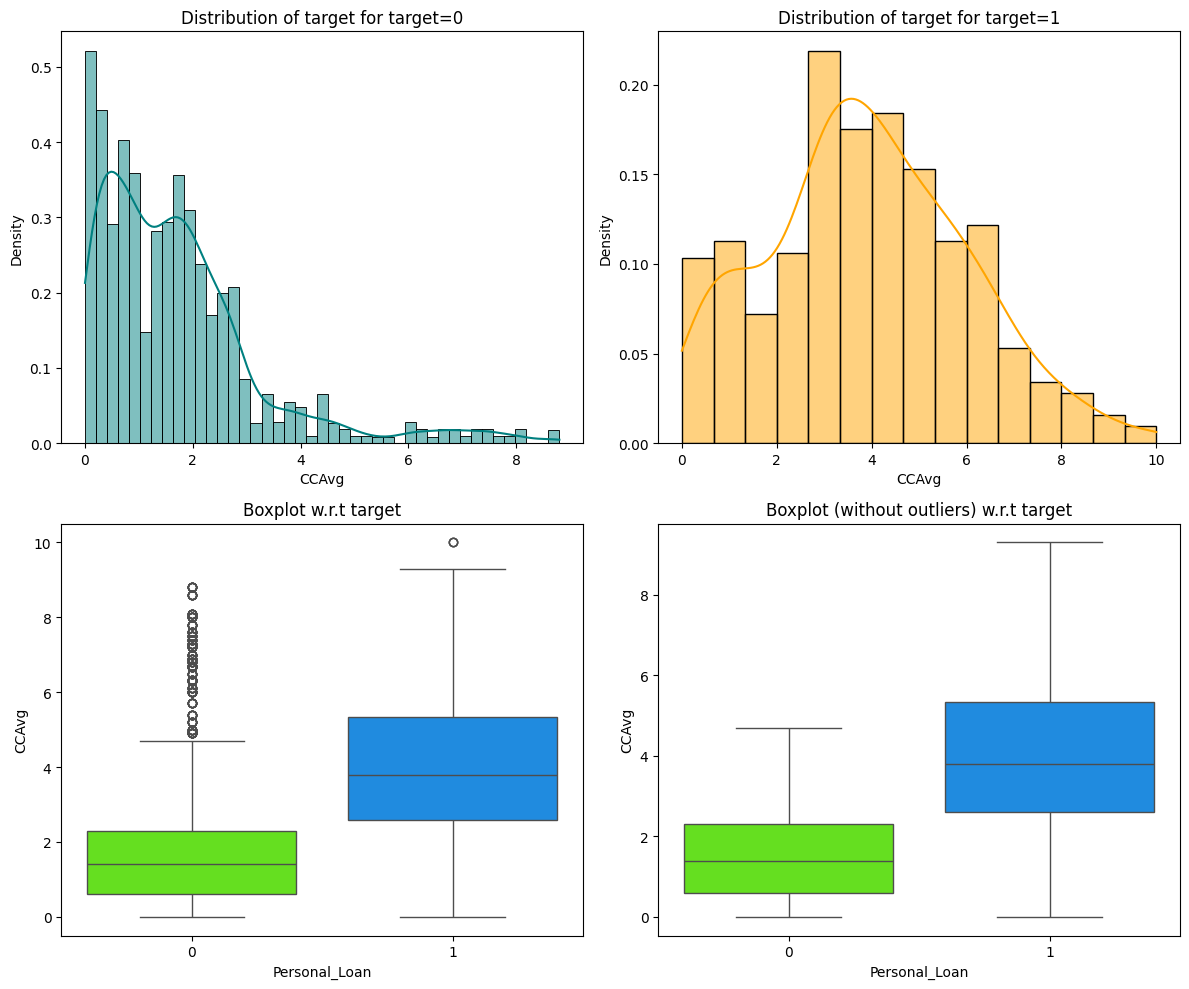

In [46]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

Customers spending on an average a little less than $4000 a month on credit cards took personal loan.

Outlier Detection

In [47]:
# Convert relevant columns to numeric types if they are categorical
for col in data.columns:
  if data[col].dtype == 'object':
    try:
      data[col] = pd.to_numeric(data[col])
    except ValueError:
      print(f"Could not convert column {col} to numeric. Please investigate this column.")

# Calculate quantiles
Q1 = data.quantile(0.25, numeric_only=True)  # To find the 25th percentile
Q3 = data.quantile(0.75, numeric_only=True)  # To find the 75th percentile

IQR = Q3 - Q1  # Interquartile Range (IQR)

lower = Q1 - 1.5 * IQR  # Lower bound for outliers
upper = Q3 + 1.5 * IQR  # Upper bound for outliers

In [48]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Data Preparation for modelling

In [49]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [50]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* We had seen that around 90.5% of observations belongs to class 0 (Didn't take loan) and 9.45% observations belongs to class 1 (Took loan), and this is preserved in the train and test sets

## Model Building

### Model Evaluation Criterion

If we predict that a customer will not accept the loan, but in reality, the customer accepts it (FN), the bank misses a valuable business opportunity.
If we predict that a customer will accept the loan, but in reality, they do not (FP), the bank incurs costs for unnecessary marketing or customer outreach efforts.
Missing a potential loan acceptance (FN) could have a bigger impact on the bank's revenue than the cost of marketing to uninterested customers (FP).

The company would want to minimize False Negatives in this case to avoid missed opportunities in offering loans to interested customers. Therefore, the focus should be on maximizing Recall, which captures the ability to correctly identify customers who will accept the loan.

Recall: The higher the recall, the more customers who actually accept the loan are correctly predicted by the model.
While increasing recall, maintaining a good Precision will help reduce unnecessary outreach efforts to those who do not accept the loan.
By maximizing Recall, the bank ensures they are reaching out to more customers who are likely to accept the loan, reducing missed opportunities.

### Model Building

In [51]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    targ/et: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

## Model Performance Improvement

In [52]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree (sklearn default)

## Model Performance Comparison and Final Model Selection

In [53]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

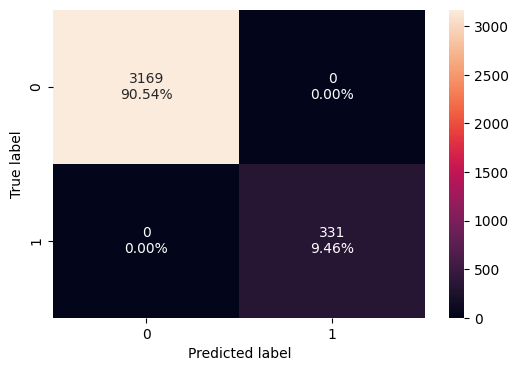

In [54]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [55]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


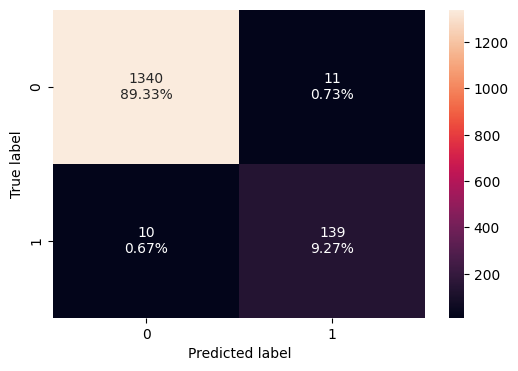

In [56]:
confusion_matrix_sklearn(model0, X_test, y_test)


In [57]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


Although slightly lower than the training scores, the test scores (accuracy = 0.986, recall ≈ 0.933, precision ≈ 0.927, F1 ≈ 0.930) are still quite high. This means the model is performing well on unseen data, but it's not perfect.

In [58]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


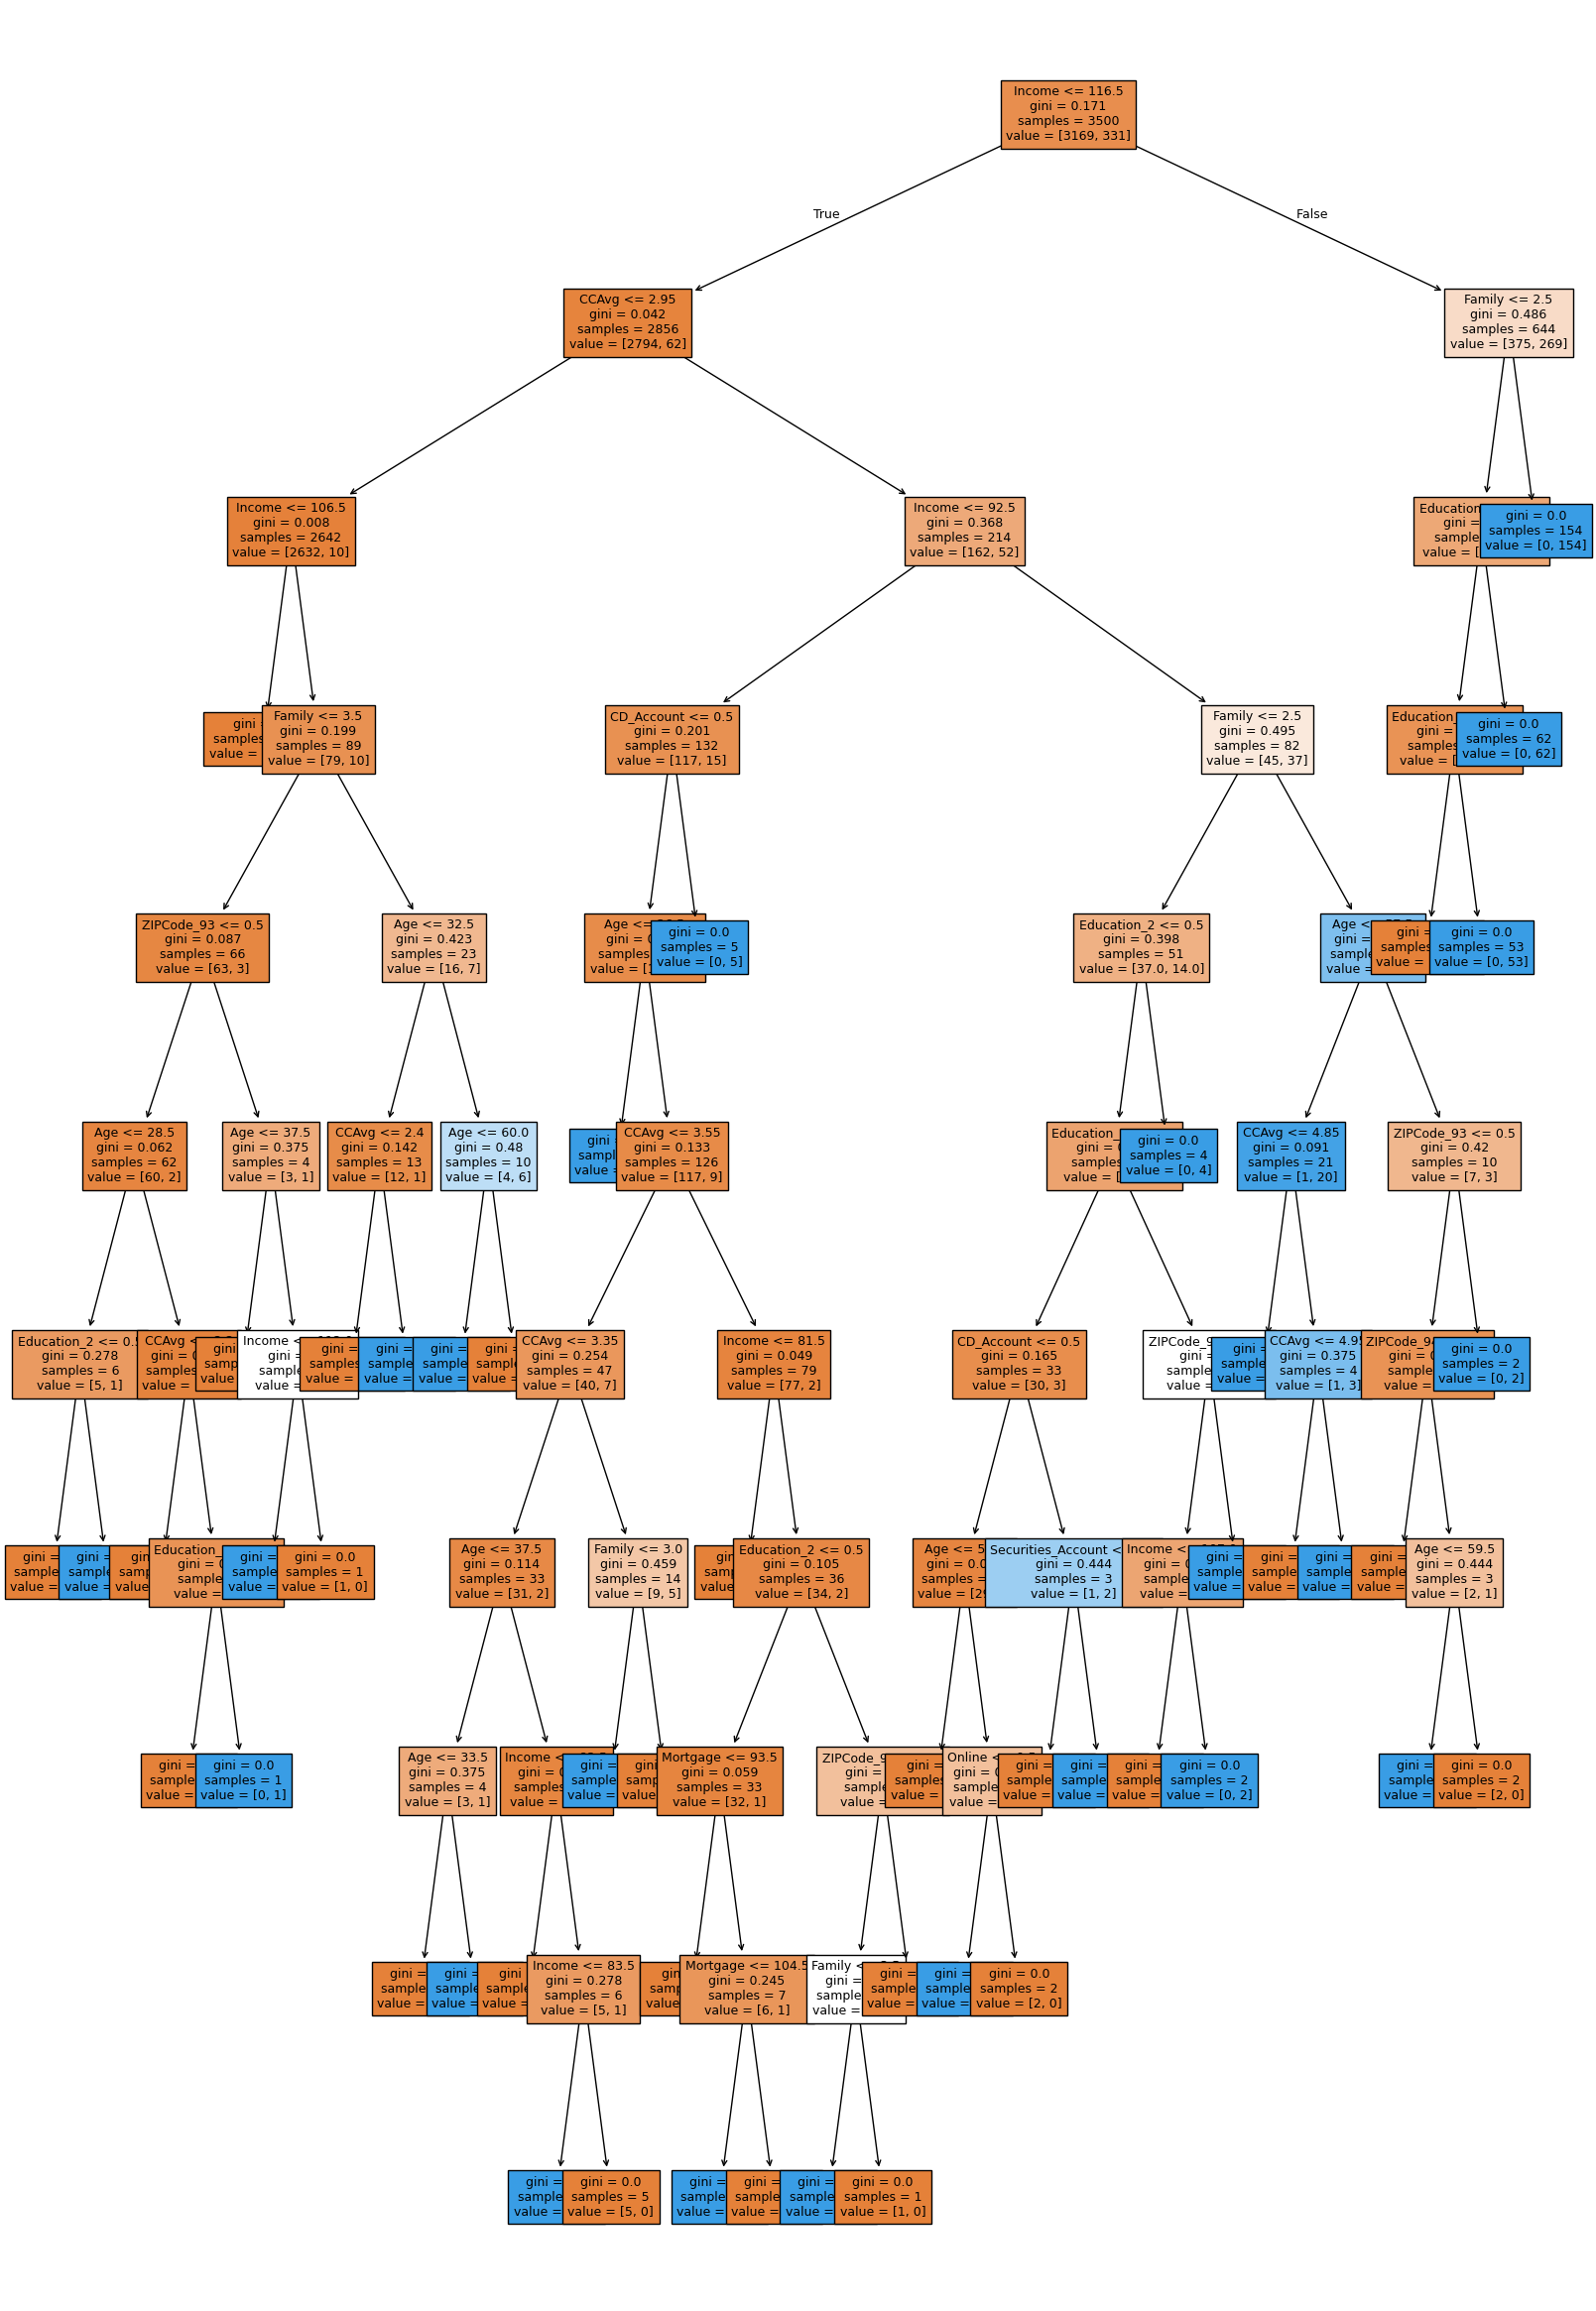

In [59]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [60]:
print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

The model shows that income and average credit card spending (CCAvg) are critical factors in determining class labels. Lower income (below 116.50) combined with lower CCAvg (below 2.95) leads to a significant proportion of class 0 predictions, while higher CCAvg increases the likelihood of class 1 predictions.

In [61]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model0.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


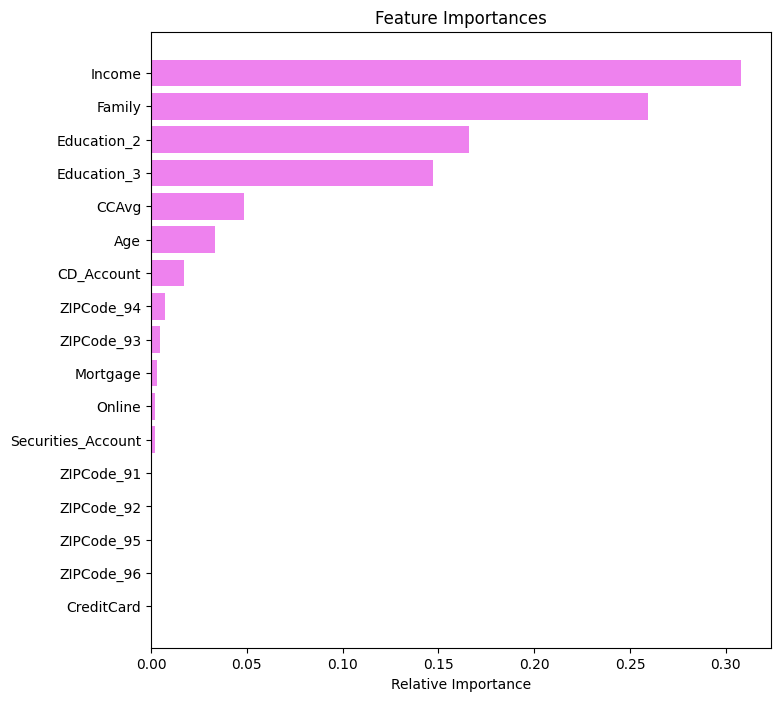

In [62]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

It's the income,family,education are the most important features to predict.

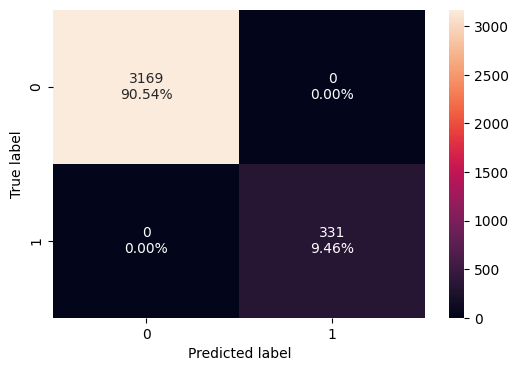

In [63]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [64]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


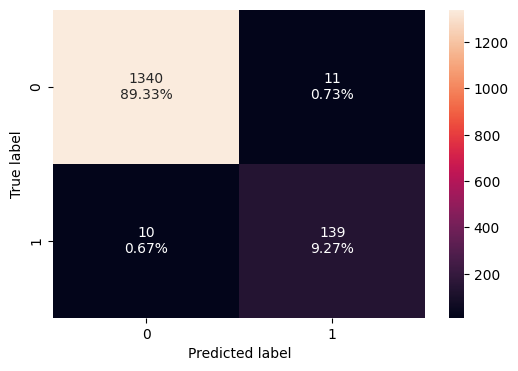

In [65]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [66]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


The training data results are perfect, showing an accuracy of 1.0 across the board, which might suggest that the model is overfitting to the training data.

However, the test data still shows strong performance with an accuracy of 98.6%, indicating that the model generalizes well to new data, but it’s important to explore ways to enhance recall and precision.

Model Performance Improvement

# Pre-pruning

In [67]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(4, 6, 8)
max_leaf_nodes_values = [42, 65, 140, 240]
min_samples_split_values = [8, 22, 40, 50]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
    max_depth=max_depth,
    max_leaf_nodes=max_leaf_nodes,
    min_samples_split=min_samples_split,
    class_weight='balanced', # Changed 'lass_weight' to 'class_weight'
    random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 4
Max leaf nodes: 42
Min samples split: 8
Best test recall score: 0.959731543624161


In [68]:
model1 = best_estimator
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=42,
                       min_samples_split=8, random_state=42)

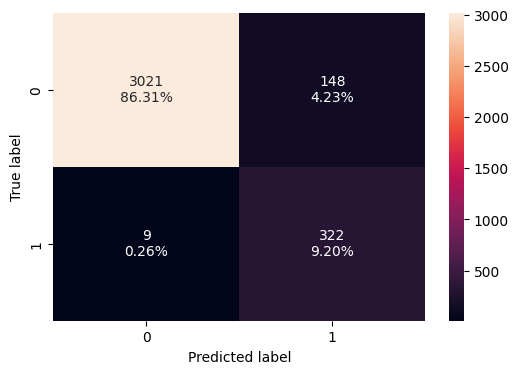

In [69]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [70]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.955143,0.97281,0.685106,0.803995


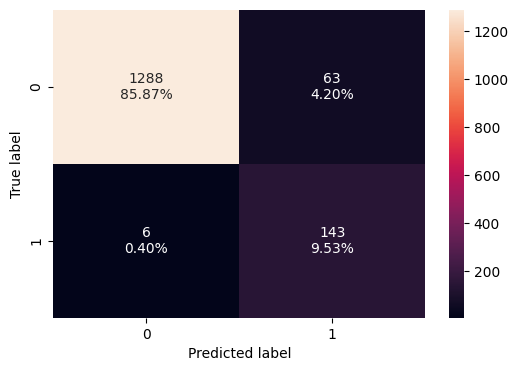

In [71]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [72]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.954,0.959732,0.694175,0.805634



The model shows strong performance on both training and test data, with high accuracy and recall, but moderately lower precision, indicating it predicts most positive cases correctly but has some false positives.

# Visualizing the Decision Tree

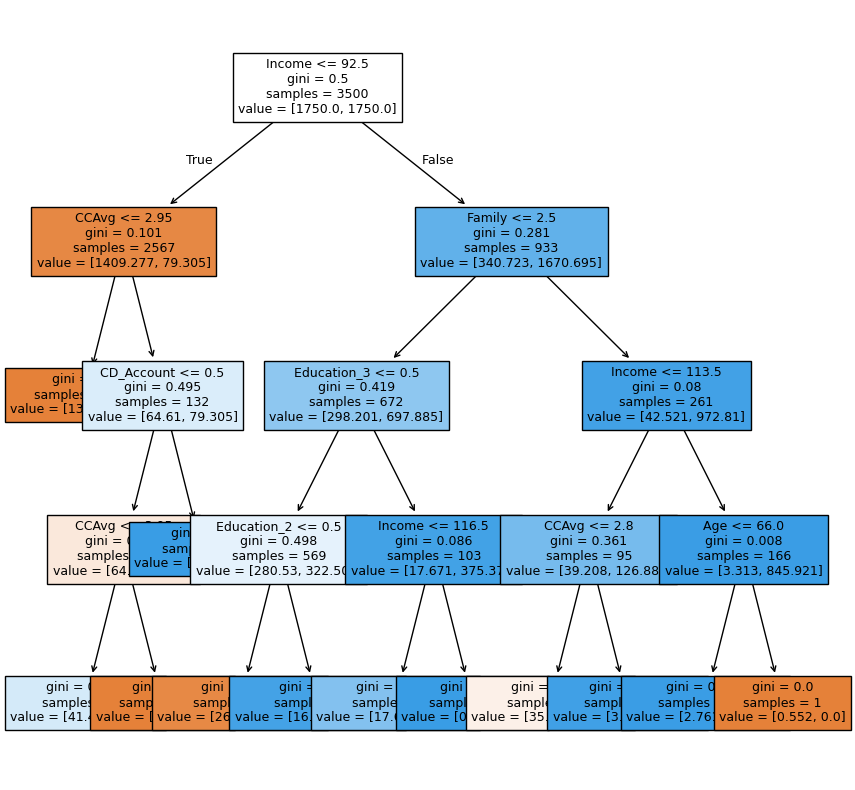

In [73]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [74]:
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [16.57, 306.65] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--- weights: [17.67, 47.58] class: 1
|   |   |   |--- Income >  116.50
|   |   |   |   |--- weights: [0.00, 327.79] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 113.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- weights: [35.89, 31.72] cla

In [75]:
print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.672754
Education_2         0.151957
CCAvg               0.070332
Education_3         0.053503
Family              0.042446
CD_Account          0.008310
Age                 0.000698
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


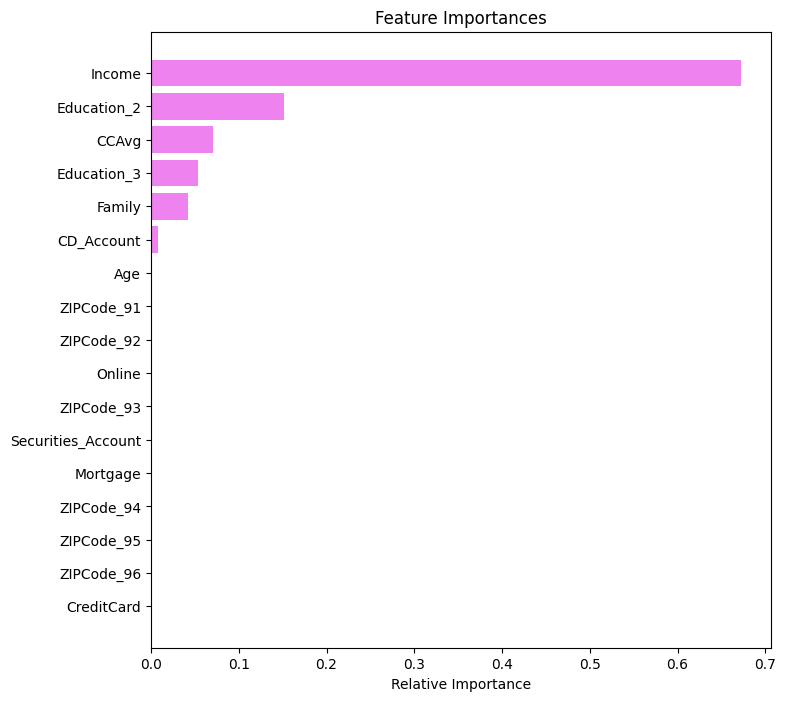

In [76]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important feature is income.


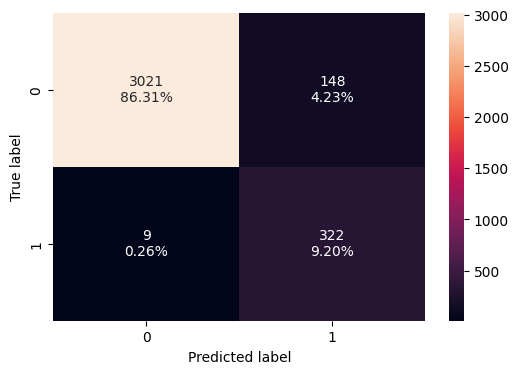

In [77]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [78]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.955143,0.97281,0.685106,0.803995


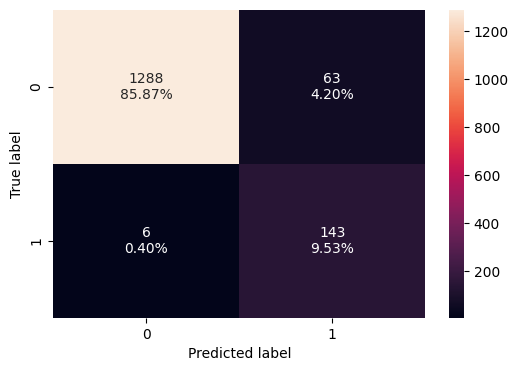

In [79]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [80]:
decision_tree_tune__perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.954,0.959732,0.694175,0.805634


The model performs really well on both the training (95.51% accuracy) and test data (95.4% accuracy). There are some false positives. The F1 scores (~80%) show that the model strikes a good balance between precision and recall.

# Post-pruning

In [81]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [82]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

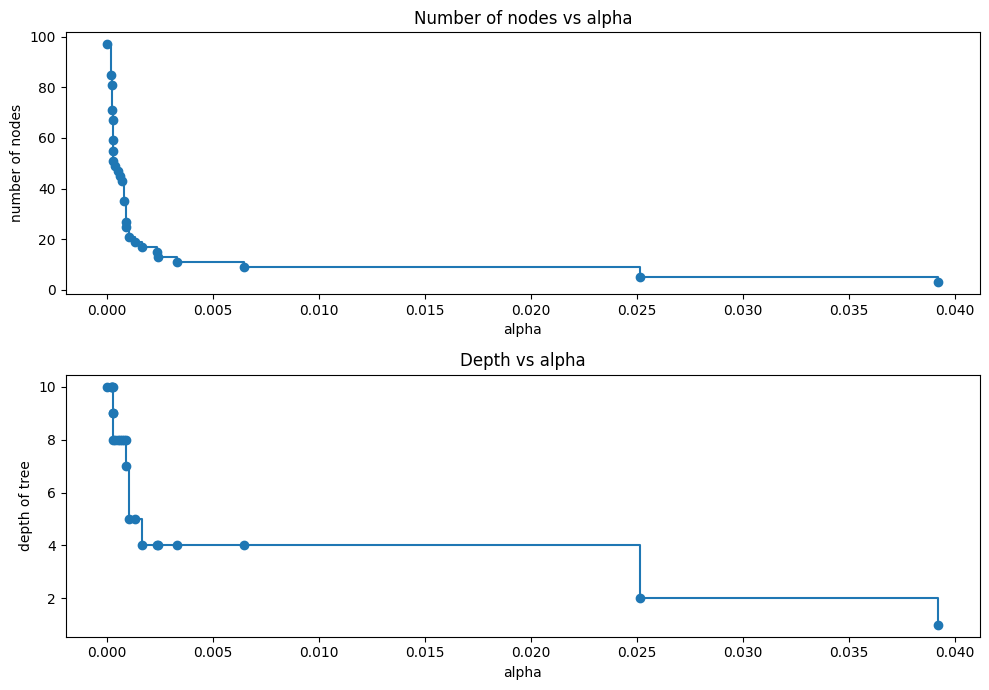

In [83]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets

In [84]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

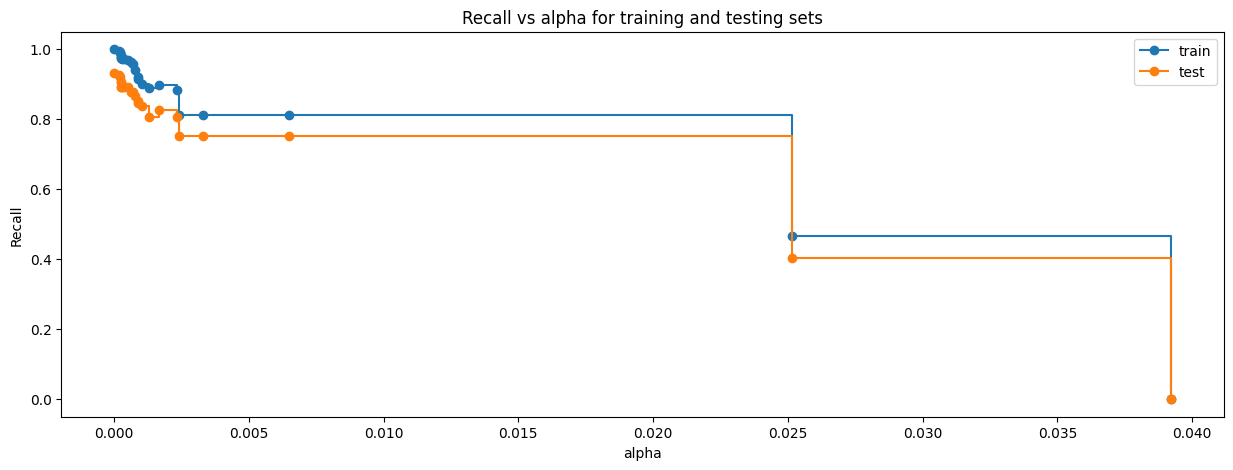

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [86]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [87]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [88]:
model2 = DecisionTreeClassifier(
    ccp_alpha=0.04708834100596766, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04708834100596766,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

Checking performance on training data

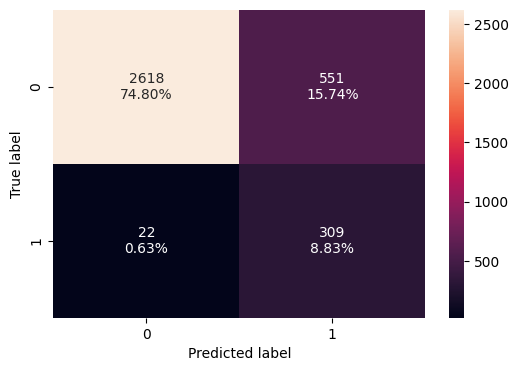

In [89]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [90]:
decision_tree_tune_post_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.836286,0.933535,0.359302,0.518892


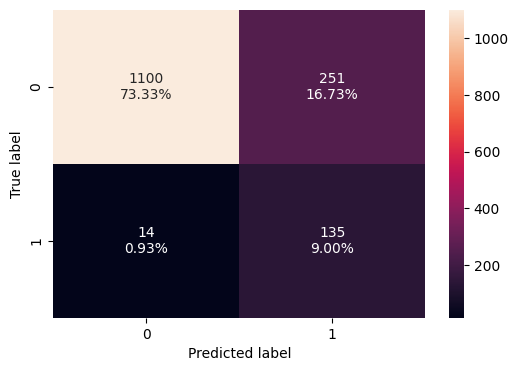

In [91]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [92]:
decision_tree_tune_post_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.823333,0.90604,0.349741,0.504673


Visualizing the Decision Tree

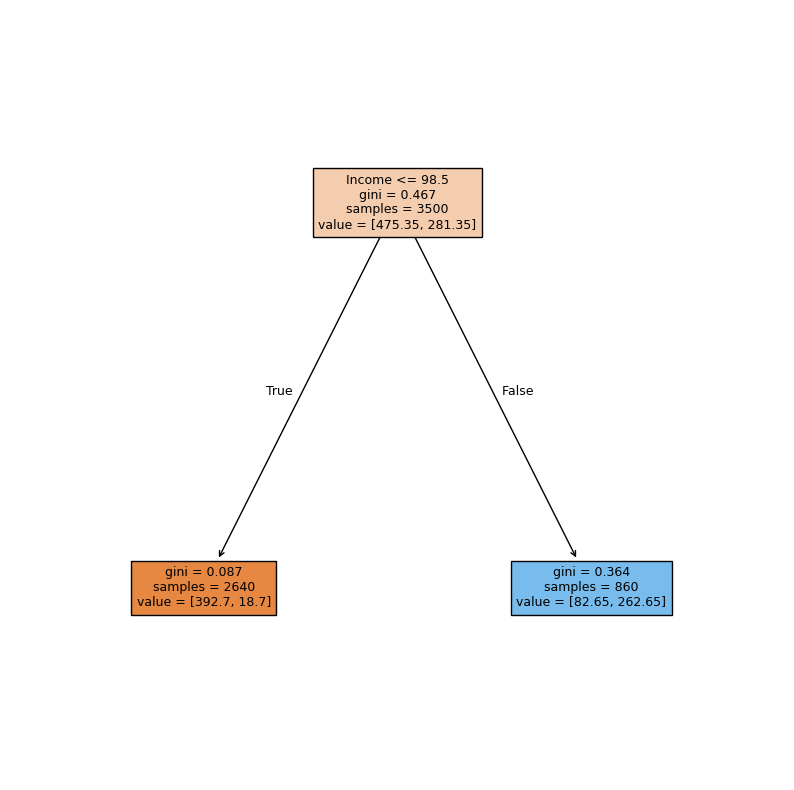

In [93]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [94]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- weights: [82.65, 262.65] class: 1



In [95]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income              1.0
Age                 0.0
ZIPCode_91          0.0
Education_2         0.0
ZIPCode_96          0.0
ZIPCode_95          0.0
ZIPCode_94          0.0
ZIPCode_93          0.0
ZIPCode_92          0.0
CreditCard          0.0
Online              0.0
CD_Account          0.0
Securities_Account  0.0
Mortgage            0.0
CCAvg               0.0
Family              0.0
Education_3         0.0


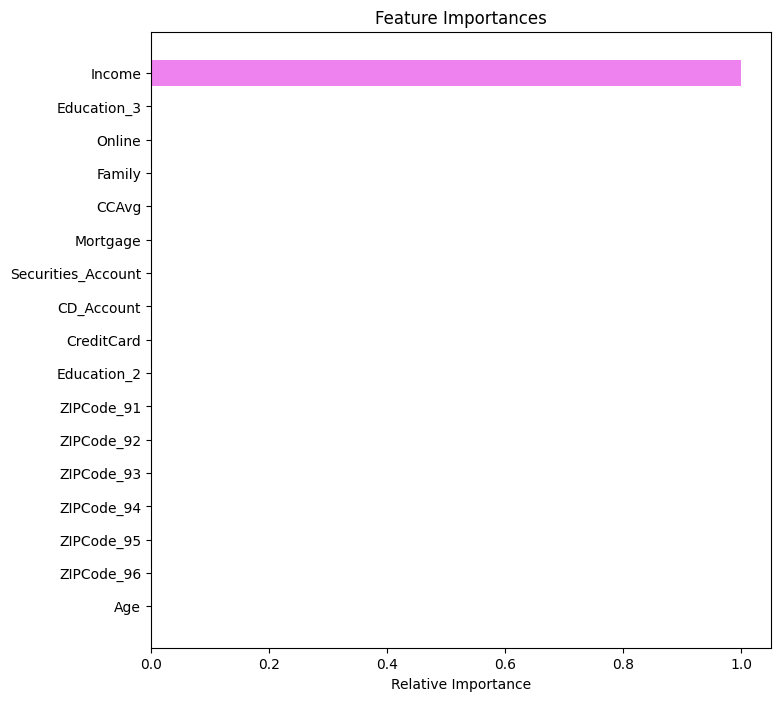

In [96]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income is the most important feature

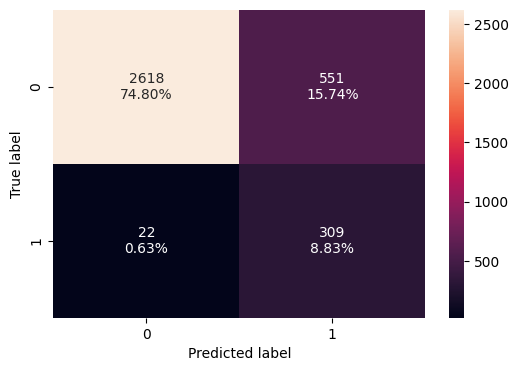

In [97]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [98]:
decision_tree_tune_post_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.836286,0.933535,0.359302,0.518892


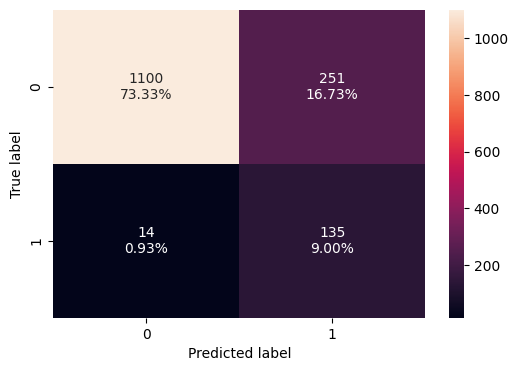

In [99]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [100]:
decision_tree_tune_post_train = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.823333,0.90604,0.349741,0.504673


The model is doing great on unseen data.

Model Performance Comparison and Final Model Selection

In [101]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
     decision_tree_tune_perf_train.T,
     decision_tree_tune_post_train.T],
    axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.955143,0.823333
Recall,1.0,0.972810,0.906040
Precision,1.0,0.685106,0.349741
F1,1.0,0.803995,0.504673


In [102]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T,
     decision_tree_tune_perf_test.T,
     decision_tree_tune_post_test.T],
    axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.954000,0.823333
Recall,0.932886,0.959732,0.906040
Precision,0.926667,0.694175,0.349741
F1,0.929766,0.805634,0.504673


The Decision Tree with Pre-Pruning is the best model, as it maintains a good balance between accuracy, recall, precision, and F1 score without overfitting like the default model. While post-pruning improves recall, its much lower precision and accuracy make it less effective.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

Based on the feature importances from the decision tree model, we can incur the following insights regarding which customer attributes significantly influence the likelihood of purchasing a personal loan:

Income:

With an importance score of 0.672754, income is the most significant factor. This indicates that higher income levels greatly increase the likelihood of a customer purchasing a personal loan. The bank should prioritize targeting customers with higher income brackets for loan offers.
Education Level:

The second most important attribute is Education_2 (importance score of 0.151957), followed by Education_3 (score of 0.053503). This suggests that customers with certain education levels are more likely to consider personal loans, potentially indicating better financial literacy or stable employment. Tailoring marketing strategies to target these educational segments can be beneficial.
CCAvg (Credit Card Average Spending):

With an importance of 0.070332, average credit card spending also plays a role. Higher spending may indicate a need for financial assistance, making these customers a good target for personal loans.
Family Size:

The Family attribute (importance score of 0.042446) has some significance, suggesting that customers with larger families may be more inclined to take personal loans, possibly for household expenses.
Low Importance Features:

Attributes such as Age, Online, Securities Account, and others have very low or zero importance scores. This indicates that these factors do not significantly influence the decision to purchase a personal loan. The bank might consider deprioritizing marketing efforts based on these attributes.
Conclusion:
The analysis reveals that Income and Education are the most critical factors influencing personal loan purchases. The bank should focus its marketing efforts on high-income individuals, particularly those with specific educational backgrounds, while considering the average credit card usage and family size as secondary factors in targeting customers.








___